# NLP Model Building: Hands-On Week-by-Week (Practical Exercises)

## Week 1: Understanding Components
Complete these exercises to master building NLP models from scratch.

### Exercise 1.1: Tokenizer Deep Dive
Goal: Understand how text becomes numbers
#### Tasks:
1. Complete the SimpleTokenizer class
2. Create vocab from sample job descriptions
3. Encode a new job description
4. Calculate vocabulary coverage (% of words in vocab)

In [ ]:
from collections import Counter

class SimpleTokenizer:
    def __init__(self):
        self.vocab = {}
    def build_vocab(self, texts):
        word_counts = Counter()
        for text in texts:
            words = text.lower().split()
            word_counts.update(words)
        # TODO: Complete this function
        pass
    def encode(self, text):
        # TODO: Convert text to token IDs
        pass

sample_texts = [
    'machine learning engineer python',
    'data scientist with nlp experience',
    'python developer backend apis',
]

# Write your solution here:
print('TODO: Implement tokenizer and test it')

### Exercise 1.2: Positional Encoding Visualization
Goal: Visualize how position information is encoded
#### Tasks:
1. Implement the positional encoding formula
2. Create encoding for 50 positions, 128 dimensions
3. Visualize using plt.imshow()
4. Observe the patterns - what do you see?

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
def create_positional_encoding(max_len, d_model):
    '''
    Create positional encoding matrix
    TODO: Implement the sine/cosine formula
    '''
    pe = np.zeros((max_len, d_model))
    # YOUR CODE HERE
    # Hint: Use np.sin() and np.cos()
    # Formula: PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    return pe

print('TODO: Implement and visualize positional encoding')

### Exercise 1.3: Attention Weights Analysis
Goal: See how attention connects words
#### Tasks:
1. Implement simple_attention function
2. Create sample Q, K, V matrices
3. Compute attention and visualize weights
4. Interpret: Which words attend to which?

In [ ]:
def simple_attention(query, key, value):
    '''
    Implement scaled dot-product attention
    TODO: Complete this function
    '''
    # Step 1: Compute attention scores (Q @ K^T)
    # Step 2: Scale by sqrt(d_k)
    # Step 3: Apply softmax
    # Step 4: Multiply by V
    pass

print('TODO: Implement attention and analyze patterns')

In [6]:
from collections import Counter

class SimpleTokenizer:
    def __init__(self, vocab_size=1000):
        self.vocab_size = vocab_size
        self.word_to_id = {}
        self.id_to_word = {}
        
    def train(self, texts):
        """Build vocabulary from texts"""
        # Step 1: Count all words
        word_counts = Counter()
        for text in texts:
            words = text.lower().split()
            word_counts.update(words)
        
        # Step 2: Create vocabulary (special tokens + most common words)
        vocab = ["<PAD>", "<UNK>"]
        most_common = word_counts.most_common(self.vocab_size - 2)
        vocab.extend([word for word, _ in most_common])
        
        # Step 3: Create mappings
        self.word_to_id = {word: i for i, word in enumerate(vocab)}
        self.id_to_word = {i: word for word, i in self.word_to_id.items()}
        
        print(f"Vocabulary size: {len(vocab)}")
        
    def encode(self, text):
        """Convert text to IDs"""
        words = text.lower().split()
        return [self.word_to_id.get(word, self.word_to_id["<UNK>"]) 
                for word in words]
    
    def decode(self, ids):
        """Convert IDs back to text"""
        return " ".join([self.id_to_word.get(id, "<UNK>") for id in ids])

# Test it
texts = [
    "machine learning engineer",
    "data scientist with python",
    "python developer backend"
]

tokenizer = SimpleTokenizer(vocab_size=20)
tokenizer.train(texts)

# Encode
encoded = tokenizer.encode("data scientist learning")
print(f"Encoded: {encoded}")  # [2, 3]

# Decode
decoded = tokenizer.decode(encoded)
print(f"Decoded: {decoded}")  # "machine learning"

Vocabulary size: 11
Encoded: [6, 7, 4]
Decoded: data scientist learning


In [7]:
# simple_tokenizer.py

from collections import Counter
import re

class SimpleTokenizer:
    def __init__(self, vocab_size=1000):
        self.vocab_size = vocab_size
        self.word2id = {}
        self.id2word = {}

    def preprocess(self, text):
        # Lowercase and keep only words/punctuation
        text = text.lower()
        text = re.sub(r"[^a-z0-9\s.,!?']", "", text)
        return text

    def train(self, texts):
        # Count all words
        counter = Counter()
        for text in texts:
            tokens = self.preprocess(text).split()
            counter.update(tokens)

        # Reserve special tokens
        vocab = ["<PAD>", "<UNK>"] + [word for word, _ in counter.most_common(self.vocab_size - 2)]

        # Build dictionaries
        self.word2id = {word: idx for idx, word in enumerate(vocab)}
        self.id2word = {idx: word for word, idx in self.word2id.items()}

    def encode(self, text):
        tokens = self.preprocess(text).split()
        return [self.word2id.get(tok, self.word2id["<UNK>"]) for tok in tokens]

    def decode(self, ids):
        return " ".join([self.id2word.get(i, "<UNK>") for i in ids])

    def vocab_size_actual(self):
        return len(self.word2id)

    def coverage(self, texts):
        total, known = 0, 0
        for text in texts:
            tokens = self.preprocess(text).split()
            total += len(tokens)
            known += sum(1 for t in tokens if t in self.word2id)
        return known / total


In [8]:
# test_simple_tokenizer.py

texts = [
    "Machine learning is amazing.",
    "Tokenization converts text into tokens.",
    "This is your first tokenizer."
]

tokenizer = SimpleTokenizer(vocab_size=20)
tokenizer.train(texts)

print("✅ Vocab size:", tokenizer.vocab_size_actual())
print("🧩 word2id:", tokenizer.word2id)
print("⚙️  Encode sample:", tokenizer.encode("Machine learning is cool"))
print("🔄 Decode sample:", tokenizer.decode(tokenizer.encode("Machine learning is cool")))
print("📈 Coverage:", round(tokenizer.coverage(texts) * 100, 2), "%")


✅ Vocab size: 15
🧩 word2id: {'<PAD>': 0, '<UNK>': 1, 'is': 2, 'machine': 3, 'learning': 4, 'amazing.': 5, 'tokenization': 6, 'converts': 7, 'text': 8, 'into': 9, 'tokens.': 10, 'this': 11, 'your': 12, 'first': 13, 'tokenizer.': 14}
⚙️  Encode sample: [3, 4, 2, 1]
🔄 Decode sample: machine learning is <UNK>
📈 Coverage: 100.0 %


In [16]:
texts = [
    "Machine learning jobs on the rise in 2025.",
    "Google launches new cloud AI platform.",
    "Remote work becomes standard in tech industry.",
    "Data scientists highly sought after for startups.",
    "India's tech exports hit record levels this year.",
    "Meta unveils generative AI recruitment tools.",
    "Python tops list of most popular programming languages.",
    "NASA tests autonomous drone navigation software.",
    "Cybersecurity experts warn of new ransomware.",
    "Software engineers enjoy flexible schedules.",
    "Climate scientists use AI to predict monsoon trends.",
    "Major tech firms announce mass hiring drives.",
    "NLP models now automate customer support.",
    "Government invests in quantum computing research.",
    "Major hackathon winners land lucrative internships.",
    "Resume screening algorithms face bias scrutiny.",
    "AI startups disrupt traditional recruitment.",
    "Fintech companies seek experienced ML engineers.",
    "New regulations impact data privacy standards.",
    "Google introduces advanced text summarization tool.",
    "Microsoft releases open-source dataset for developers.",
    "Front-end web developers in high demand.",
    "Remote interview processes improve candidate experience.",
    "Investment in blockchain surges globally.",
    "Universities offer online courses in data science.",
    "Real estate startups leverage computer vision.",
    "Companies race to deploy AI-powered chatbots.",
    "Students build object detection apps for projects.",
    "E-commerce platforms rely on recommendation systems.",
    "Research shows improved NLP model accuracy.",
    "Businesses digitize hiring workflows.",
    "Healthcare industry adopts predictive analytics.",
    "New job portal uses generative AI for matching.",
    "Employees embrace hybrid work arrangements.",
    "Technology giants pledge support for open innovation.",
    "Social media platforms unveil new safety features.",
    "Energy sector recruits big data analysts.",
    "International summit discusses future of automation.",
    "Startups host coding competitions for freshers.",
    "HR managers rely on data-driven hiring strategies.",
    "Online marketplaces experience growth in 2025.",
    "AI tutors assist students with exam preparation.",
    "Digital transformation accelerates across industries.",
    "Virtual reality used for remote onboarding.",
    "App developers launch new productivity tools.",
    "IT professionals upskill with bootcamp training.",
    "Global firms expand cloud infrastructure investments.",
    "Robotics engineers design efficient warehouse systems.",
    "Data visualization platforms reach wider audiences.",
    "AI-generated cover letters now common in applications."
]

tokenizer = SimpleTokenizer(vocab_size=500)
tokenizer.train(texts)



In [18]:
print("✅ Vocab size:", tokenizer.vocab_size_actual())
print("🧩 word2id:", tokenizer.word2id)
print("⚙️  Encode sample:", tokenizer.encode("Machine learning is cool"))
print("🔄 Decode sample:", tokenizer.decode(tokenizer.encode("Machine learning is cool")))
print("📈 Coverage:", round(tokenizer.coverage(texts) * 100, 2), "%")
top_10_words = list(tokenizer.word2id.keys())[:10]
print("Top 10 words in vocab:", top_10_words)


✅ Vocab size: 253
🧩 word2id: {'<PAD>': 0, '<UNK>': 1, 'in': 2, 'for': 3, 'new': 4, 'ai': 5, 'data': 6, 'on': 7, 'remote': 8, 'tech': 9, 'of': 10, 'hiring': 11, 'startups': 12, 'platforms': 13, '2025.': 14, 'google': 15, 'cloud': 16, 'work': 17, 'scientists': 18, 'generative': 19, 'tools.': 20, 'engineers': 21, 'to': 22, 'major': 23, 'firms': 24, 'nlp': 25, 'now': 26, 'companies': 27, 'developers': 28, 'online': 29, 'students': 30, 'rely': 31, 'systems.': 32, 'with': 33, 'machine': 34, 'learning': 35, 'jobs': 36, 'the': 37, 'rise': 38, 'launches': 39, 'platform.': 40, 'becomes': 41, 'standard': 42, 'industry.': 43, 'highly': 44, 'sought': 45, 'after': 46, 'startups.': 47, "india's": 48, 'exports': 49, 'hit': 50, 'record': 51, 'levels': 52, 'this': 53, 'year.': 54, 'meta': 55, 'unveils': 56, 'recruitment': 57, 'python': 58, 'tops': 59, 'list': 60, 'most': 61, 'popular': 62, 'programming': 63, 'languages.': 64, 'nasa': 65, 'tests': 66, 'autonomous': 67, 'drone': 68, 'navigation': 69, 'sof

In [19]:
from collections import Counter
class charTokenizer:
    def __init__(self, vocab_size=100):
        self.vocab_size = vocab_size
        self.char2id = {}
        self.id2char = {}
    def train(self, texts):
        chars=set()
        for text in texts:
            for char in text:
                chars.add(char)
        vocab=["<PAD>","<UNK>"] + sorted(list(chars))
        self.char2id={char:i for i,char in enumerate(vocab)}
        self.id2char={i : c for c,i in self.char2id.items()}
    def encode(self,text):
        return [self.char2id.get(c,self.char2id["<UNK>"]) for c in text]
    def decode(self,ids):
        return "".join([self.id2char.get(i,"<UNK>") for i in ids])
# Test charTokenizer
    def vocab_size(self):
        return len(self.char2id)

    def coverage(self, texts):
        total, known = 0, 0
        for text in texts:
            for ch in text:
                total += 1
                if ch.lower() in self.char2id:
                    known += 1
        return known / total

In [28]:
texts = [
    "Machine learning is fun!",
    "NLP is powerful.",
    "Tokenization converts text into tokens."
]


In [29]:


word_tok = SimpleTokenizer(vocab_size=100)
word_tok.train(texts)

char_tok = charTokenizer()
char_tok.train(texts)
print("Word vocab size:", word_tok.vocab_size_actual())
print("Char vocab size:", char_tok.vocab_size)
print("Word coverage:", round(word_tok.coverage(texts)*100, 2), "%")
print("Char coverage:", round(char_tok.coverage(texts)*100, 2), "%")

sample = "Machine learning is awesome!"
print("\nEncoding sample:")
print("Word:", word_tok.encode(sample))
print("Char:", char_tok.encode(sample))

Word vocab size: 13
Char vocab size: 100
Word coverage: 100.0 %
Char coverage: 98.73 %

Encoding sample:
Word: [3, 4, 2, 1]
Char: [6, 10, 11, 15, 16, 19, 12, 2, 18, 12, 10, 22, 19, 16, 19, 14, 2, 16, 23, 2, 10, 27, 12, 23, 20, 1, 12, 3]


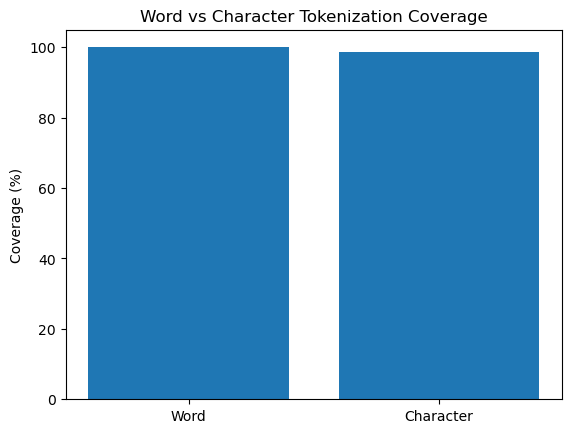

: 

In [ ]:
import matplotlib.pyplot as plt

labels = ["Word", "Character"]
coverage = [word_tok.coverage(texts)*100, char_tok.coverage(texts)*100]

plt.bar(labels, coverage)
plt.ylabel("Coverage (%)")
plt.title("Word vs Character Tokenization Coverage")
plt.show()
